# jammer
## 15- IGRINS data of Brown Dwarfs
### Vb. Run01 `star_marley.py` on 2M0136


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib.ticker import MaxNLocator

In [2]:
import pandas as pd

In [ ]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

### There are 30 K-band Chunks.

Only some of the K-band chunks have been *attempted*, and only some of those were *successful*.

### Attempts:  
9, 8,7,6,5,4,3,2,1,0, 15

### Fails:
6, 2, 1, 0

### Successes
9, 8,7, 5, 4, 3

### Pending
15, SpeX

In [76]:
chs = ['K_ch009', 'K_ch008', 'K_ch007','K_ch005', 'K_ch004', 'K_ch003']

In [73]:
ws = np.load("../sf/2M0136/K_ch002/output/marley_grid/run01/temp_emcee_chain.npy")

In [74]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

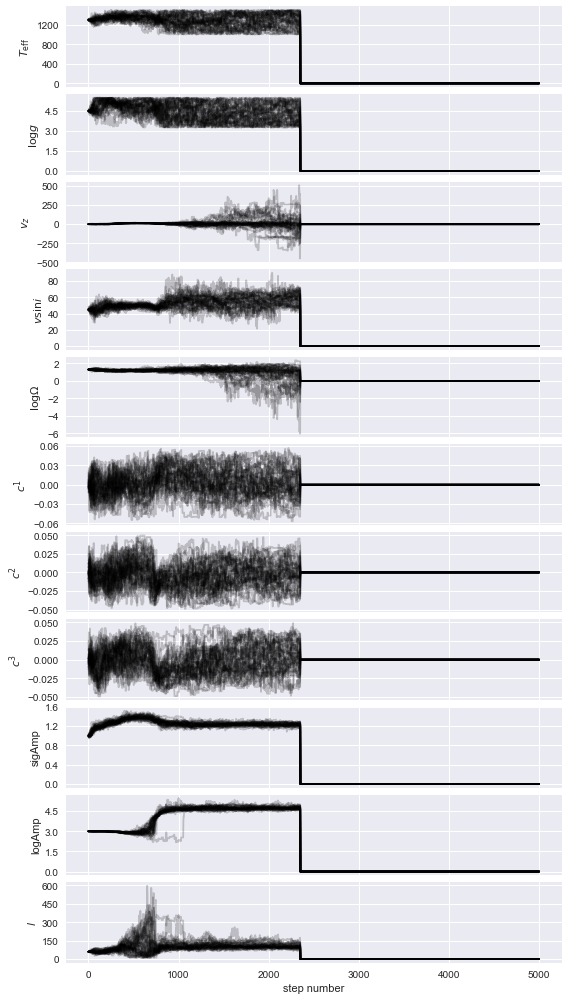

In [75]:
fig, axes = plt.subplots(11, 1, sharex=True, figsize=(8, 14))
for i in range(0, 11, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[10].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

In [8]:
fc.shape

(40000, 11)

In [11]:
dat1 = pd.read_csv('../sf/2M0136/K_ch007/output/marley_grid/run01/spec_config.csv')
dat2 = pd.read_csv('../sf/2M0136/K_ch007/output/marley_grid/run01/models_draw.csv')

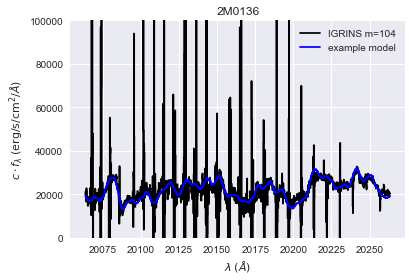

In [12]:
plt.step(dat1.wl, dat1.data, 'k', label='IGRINS m=104')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='example model')
#plt.step(dat1.wl, dat1.model_composite, 'r',label='Guess')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$c\cdot f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('2M0136')
plt.legend(loc='best')
plt.ylim(0, 100000)
plt.yscale('linear')

# Plot everything

/Users/gully/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


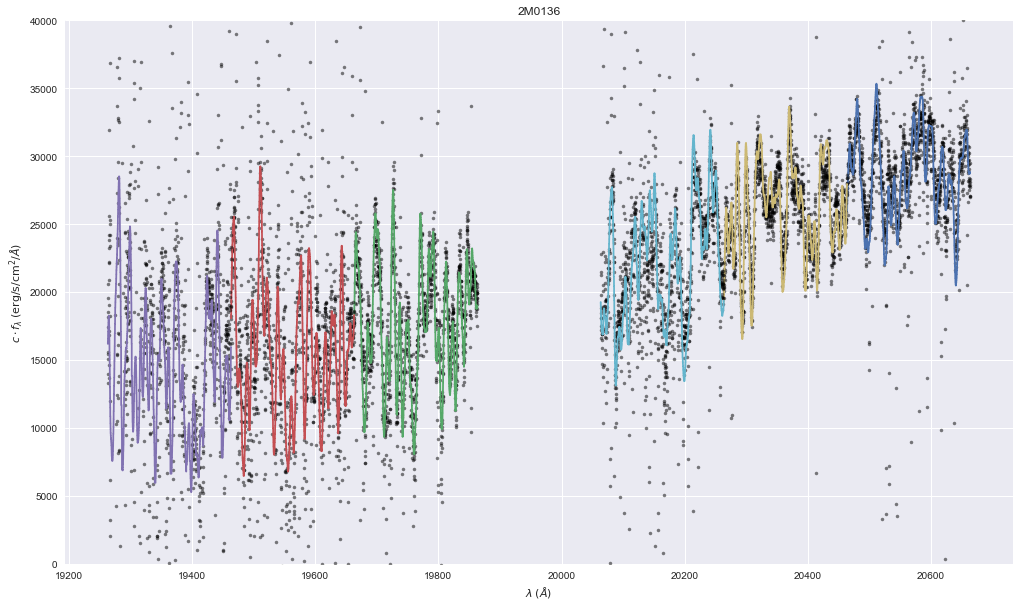

In [44]:
plt.figure(figsize=(17, 10))

for ch in ['K_ch009', 'K_ch005', 'K_ch004', 'K_ch003', 'K_ch008', 'K_ch007']:
    
    #dat1 = pd.read_csv('../sf/2M0136/K_ch007/output/marley_grid/run01/spec_config.csv')
    dat2 = pd.read_csv('../sf/2M0136/{}/output/marley_grid/run01/models_draw.csv'.format(ch))

    plt.plot(dat2.wl, dat2.data.values, 'k.', alpha=0.5)    
    plt.step(dat2.wl, dat2.model_comp50.values, alpha=1.0)


    

plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$c\cdot f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('2M0136')
plt.legend(loc='best')
plt.ylim(0, 40000)
plt.yscale('linear')

### Distribution of Teff, logg by chunk.

In [83]:
sns.set_context('notebook', font_scale=2.0)

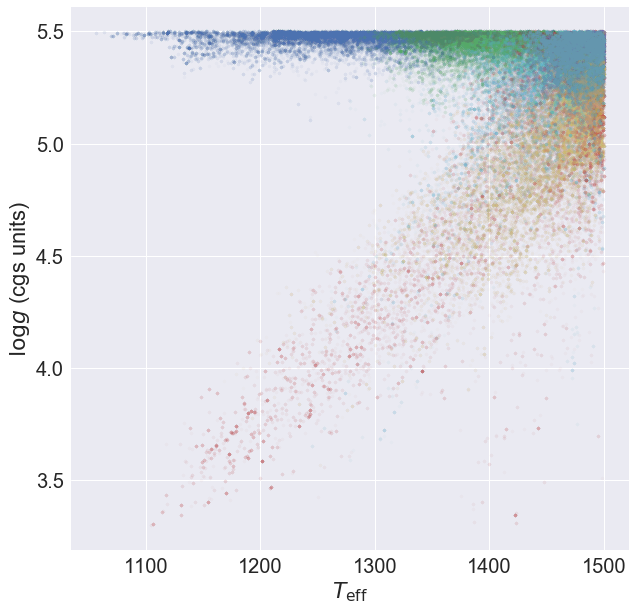

In [85]:
plt.figure(figsize=(10, 10))
for ch in chs:
    ws = np.load("../sf/2M0136/{}/output/marley_grid/run01/emcee_chain.npy".format(ch))
    burned = ws[:, -1000:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    plt.plot(fc[:, 0], fc[:, 1], '.', alpha=0.03)
    
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$\log{g}$ (cgs units)')

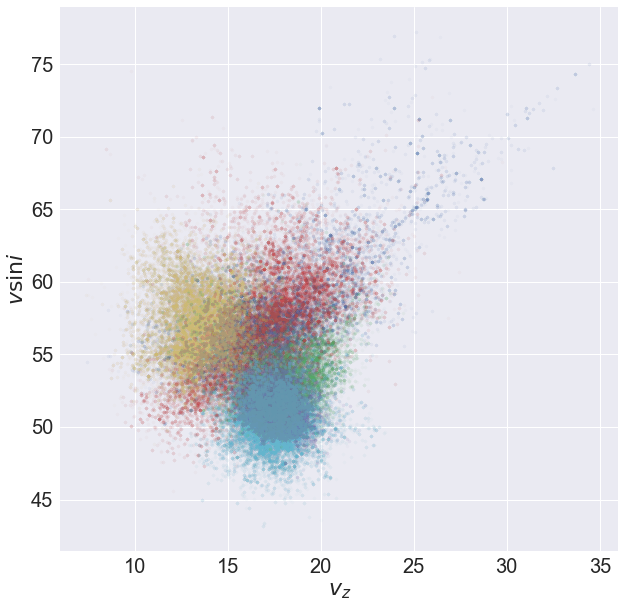

In [88]:
plt.figure(figsize=(10, 10))
for ch in chs:
    ws = np.load("../sf/2M0136/{}/output/marley_grid/run01/emcee_chain.npy".format(ch))
    burned = ws[:, -1000:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    plt.plot(fc[:, 2], fc[:, 3], '.', alpha=0.03)
    
plt.xlabel('$v_z$')
plt.ylabel(r'$v \sin{i}$')

(0, 200)

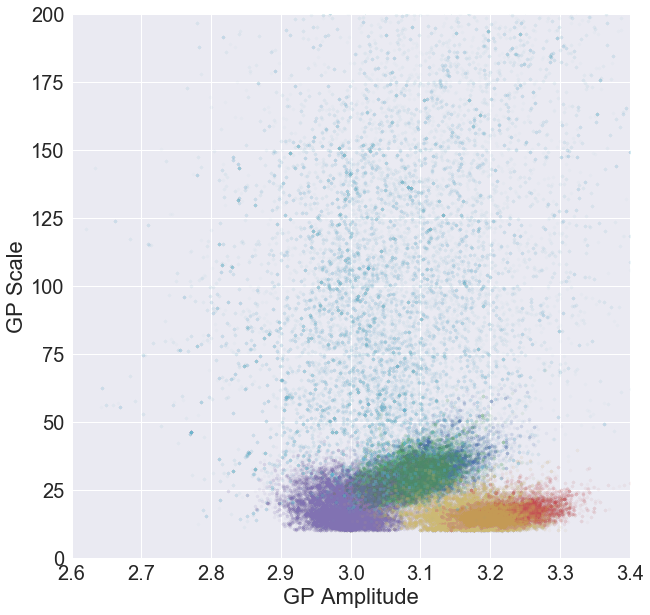

In [93]:
plt.figure(figsize=(10, 10))
for ch in chs:
    ws = np.load("../sf/2M0136/{}/output/marley_grid/run01/emcee_chain.npy".format(ch))
    burned = ws[:, -1000:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    plt.plot(fc[:, -2], fc[:, -1], '.', alpha=0.03)
    
plt.xlabel('GP Amplitude')
plt.ylabel('GP Scale')
plt.xlim(2.6, 3.4)
plt.ylim(0, 200)

In [14]:
import corner

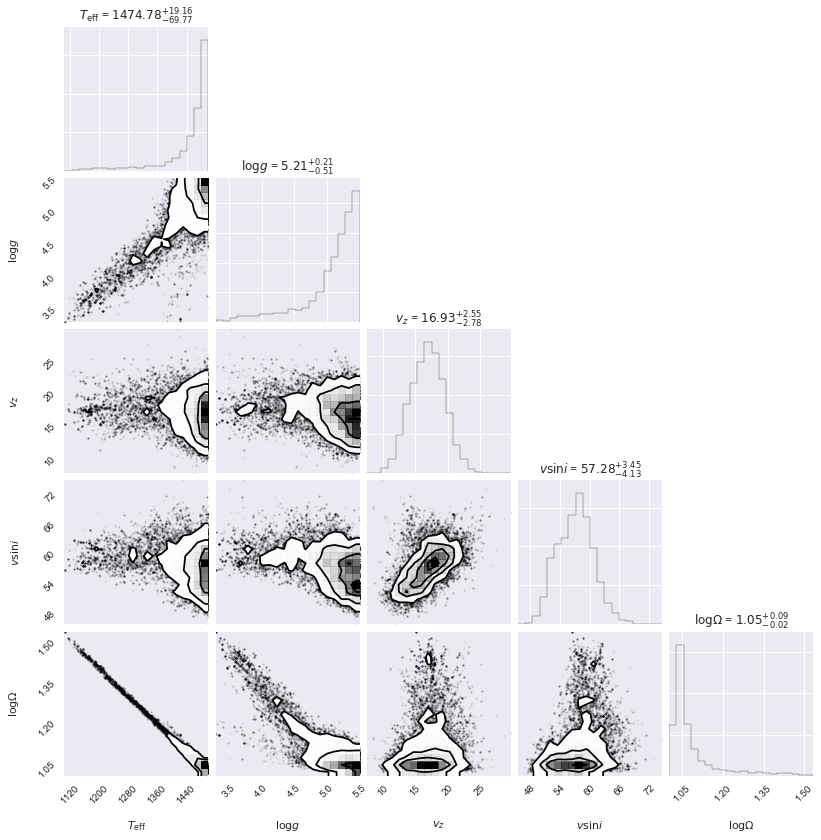

In [15]:
fig = corner.corner(fc[:, 0:5], labels=label[0:5], show_titles=True)
fig.savefig('../results/2M0136_K_ch007_corner.png', dpi=300)

The end.